In [1]:
import numpy as np
import random #good enough practice
import matplotlib.pyplot as plt
#import math 
#import statistics
#from scipy import stats
#import seaborn as sns

# ND Gaussian Metropolis Hasting

### setting parameters

In [2]:
### Setting Parameters ### 
# to increase number of dimensions, include mu and sigma for those dimensions
mu=[10,15,3]

#larger sigmas can have a impact on the acceptance rate. 
sigma = [
        [1,0,0],
        [0,4,0],
        [0,0,2]
        ]

number_of_trials=1000
number_of_stacks=20 # number of recatngles on graph

### function

In [3]:
def Gaussian_Metropolis_Hasting(number_of_trials,mu,sigma):
    
    #initialising parameters
    accepted=0
    states = [] # the states of the MH
    current=[]
    kernel_width = 1 #random values to start with
    keep_up_to_date_kernel_counter = 0  
    
    for i in range (0,len(mu)):
        current.append( random.uniform(-sigma[i][i]+mu[i],sigma[i][i]+mu[i]))#choose a random number (central) to begin
   
    for i in range(1,number_of_trials+1):#repeat per number of trials
        states.append(current) # add the current value to list of MH values
        
        #random numbers for predicted
        predicted=[]
        for variable in range (0,len(mu)):
            predicted.append( random.uniform(current[variable]-kernel_width,current[variable]+kernel_width)) # predict a value, based off how close the running acceptance rate is to ideal 25-27%
        
        # x subtract the mean
        current_take_mu = np.subtract(current,mu)
        predicted_take_mu = np.subtract(predicted,mu)

        #half the transposed x - mu
        current_half_transpose =  -0.5* current_take_mu.transpose()
        predicted_half_tranpose = -0.5* predicted_take_mu.transpose()

        #inverse sigma multiplied by current x-mu
        current_multiplied = np.matmul(np.linalg.inv(sigma), current_take_mu )
        predicted_multiplied = np.matmul(np.linalg.inv(sigma), predicted_take_mu )
        
        #exponent of equation
        current_gaussian = np.exp( np.matmul(current_half_transpose,current_multiplied) )
        predicted_gaussian = np.exp( np.matmul(predicted_half_tranpose,predicted_multiplied) )
        
        #acceptance rate
        acceptance = min(predicted_gaussian/current_gaussian,1) # if the proability of predicted is grater than current given the known distribution   

        if random.uniform(0,1)<acceptance: #if the probability of the predicted value is greater than a random float accept it. if not... do nothing
            current = predicted #set the current value to the predicted one
            accepted=accepted+1
            
        if accepted/i > 0.27: #if the acceptance rate is too high > 27% 
            kernel_width = kernel_width - ((accepted/i)-0.25)# make sure it requires a closer number to current next iteration
        if accepted/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
            kernel_width = kernel_width + (0.27-(accepted/(i))) # make sure it requires a further number to current next iteration
        
        keep_up_to_date_kernel_counter= keep_up_to_date_kernel_counter+1
        if keep_up_to_date_kernel_counter==15: # we want to restart counting the accepted rate after the warm up period
            accepted=int(0.26*i) #remove any inconsitency from the warm up period
            keep_up_to_date_kernel_counter=0
            
    return states ,accepted;# [burn_in:] # uncomment if having a warm up 20%



In [4]:
MH_predictions,accepted =  Gaussian_Metropolis_Hasting(number_of_trials,mu=mu,sigma=sigma) # run the MH prediction: number of iterations, mean and variation. 


In [5]:
MH_predictions

[[9.137512083574608, 17.37904475541705, 1.4592386257845034],
 [9.058971833932054, 17.119038305460087, 1.314124364913663],
 [9.140329091311918, 17.212188548620837, 1.1063640273036386],
 [8.70522289998219, 17.126136069569462, 1.4708946848429212],
 [9.338697967288965, 16.461162307719402, 2.5108604022075087],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.5094949360712, 1.571307478981411],
 [10.029931449905533, 14.50949493

### aacceptance rate

In [6]:
#the acceptance rate is based on the values after the warm up period
#to make the acceptance values include that of the warm up period comment out the lines as indicated above
print('Acceptance Rate:', round(accepted*100/number_of_trials,2),'%') #print the acceptance rate - for accuracry purpose only
    

Acceptance Rate: 25.8 %


#  
# 
# 
# Graphing Sampled Dimensions

In [7]:
x=[]
y=[]
z=[]
for i in range (0,len(MH_predictions)):
    x.append(MH_predictions[i][0])
    y.append(MH_predictions[i][1])
    z.append(MH_predictions[i][2])

### first dimension graphed

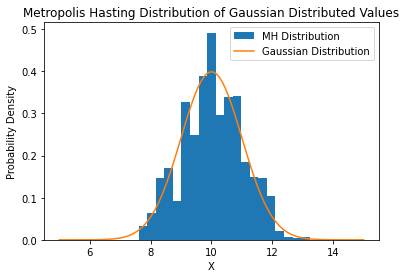

In [8]:

### Plotting Distribution Graph ###
normal_curve = [((np.exp((-(l-mu[0])**2)/(2*sigma[0][0]**2))) / (sigma[0][0] * np.sqrt(2*np.pi)) ) for l in np.linspace(mu[0]-5*sigma[0][0],mu[0]+5*sigma[0][0],100)] #curve of known distribution to compare against  
histogram_of_MH_predictions = plt.hist(x,density=True, stacked=True,bins=number_of_stacks,label="MH Distribution")  # plot a histrogram of predicted values
plt.plot(np.linspace(mu[0]-5*sigma[0][0],mu[0]+5*sigma[0][0],100),normal_curve,label="Gaussian Distribution") #plot known distributions

# graph labels
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Metropolis Hasting Distribution of Gaussian Distributed Values')
plt.legend()
plt.show()

### first 2 dimensions graphed

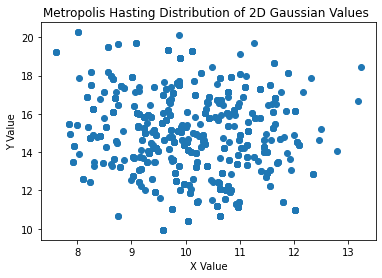

In [9]:

plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Metropolis Hasting Distribution of 2D Gaussian Values ')

plt.scatter(x, y)
plt.show()

### first 3 dimensions graphed

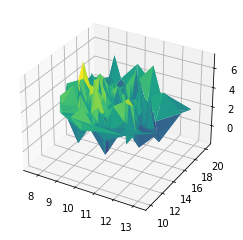

In [10]:
from mpl_toolkits import mplot3d
  
ax = plt.axes(projection ='3d')
ax.plot_trisurf(x, y, z,
                cmap ='viridis', linewidths = 0.2);

# 
# 
# 
# 
# Graph of MH Accepted Values

### accumulartive accepted values, change MH_Predictions to x, y or z for individual variables

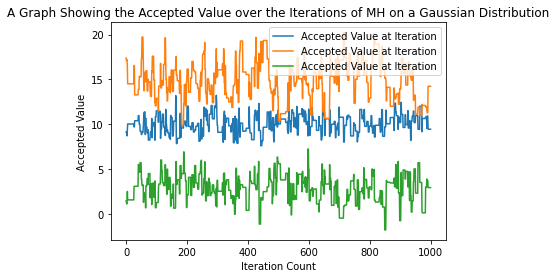

In [11]:
# the flat lines is when the MH algorithm rejects the precited value
plt.plot(MH_predictions ,label="Accepted Value at Iteration") 
plt.xlabel('Iteration Count')
plt.ylabel('Accepted Value')
plt.title('A Graph Showing the Accepted Value over the Iterations of MH on a Gaussian Distribution')
plt.legend()
plt.show()

# 
# 
# 
# 
# We know it should be guassian, lets check if it is...

### Mean and Covarience

In [12]:
#more samples gets closer to ideal results
print('mean should be',mu,'but is [',np.mean(x),',',np.mean(y),',',np.mean(z))
print('covarience is',np.cov(x) ,np.cov(y) ,np.cov(z))

mean should be [10, 15, 3] but is [ 10.055601657181839 , 14.857076946484103 , 2.872896559310513
covarience is 1.0203290529133728 4.81736654400101 2.204507213834498


### Accumulative frequency

In [13]:
#computedensity curve going up vs what gaussian should be going up
xaxis = sorted(x)
yaxis=[]
for i in range (0,len(x)): #making a list for the frequency
    yaxis.append(i)

#known gaussian distrubtion    
gauss = np.random.normal(mu[0], sigma[0][0], len(x)*10)            
gauss=sorted(gauss)
y1=[]
for i in range (0,len(gauss)): #a list for the frequency ... a higher number was used to be more exact
    y1.append(i/10)




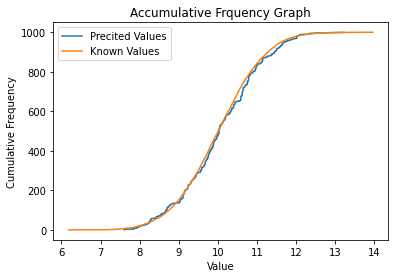

In [14]:
plt.plot(xaxis, yaxis,label="Precited Values")
plt.plot(gauss, y1, label="Known Values")

plt.xlabel('Value')
plt.ylabel('Cumulative Frequency')
plt.title('Accumulative Frquency Graph')
plt.legend()
plt.show()

#### T-test & Z-Test

In [15]:
ttest=(np.mean(x)-mu[0])/(sigma[0][0]/np.sqrt(len(x)))
print('t-test:',ttest)

#If the value of z is greater than 1.96 or less than -1.96, the null hypothesis is rejected.
ztest=(np.mean(x)-mu[0])/(sigma[0][0])
print('x-test:',ztest)

t-test: 1.7582787837447007
x-test: 0.05560165718183896


## Jarque-Bera Test

In [16]:
n = number_of_trials

In [17]:
summation_pow4 = 0
summation_pow3 = 0
summation_pow2 = 0

for i in range (0,len(x)):
    summation_pow4 = summation_pow4 + (x[i]-mu[0])**4
    summation_pow3 = summation_pow3 + (x[i]-mu[0])**3
    summation_pow2 = summation_pow2 + (x[i]-mu[0])**2

In [18]:
skewness_top = summation_pow3/n

In [19]:
skewness_bottom = (summation_pow2/n)**(3/2)

In [20]:
skewness = skewness_top/skewness_bottom

In [21]:
kurtosis_top = summation_pow4/n

In [22]:
kurtosis_bottom = (summation_pow2/n)**2

In [23]:
kurtosis = kurtosis_top/kurtosis_bottom

In [24]:
JB = n*(((skewness**2)/6)+(((kurtosis-3)**2)/24))
JB

10.364961680281251